In [9]:
!pip install matplotlib


Dados gerados aleatoriamente:
Número de itens: 12
Capacidade da mochila: 110
Pesos dos itens: [19, 12, 44, 36, 10, 18, 43, 38, 44, 7, 53, 55]
Valores dos itens: [13, 87, 73, 87, 19, 28, 74, 57, 10, 78, 42, 85]

Tempo de execução da Força Bruta para n=10: 0.000026 segundos
Tempo de execução da Programação Dinâmica para n=10: 0.000009 segundos
Tempo de execução da Força Bruta para n=20: 0.000038 segundos
Tempo de execução da Programação Dinâmica para n=20: 0.000009 segundos
Tempo de execução da Força Bruta para n=30: 0.000054 segundos
Tempo de execução da Programação Dinâmica para n=30: 0.000014 segundos
Tempo de execução da Força Bruta para n=40: 0.000071 segundos
Tempo de execução da Programação Dinâmica para n=40: 0.000023 segundos
Tempo de execução da Força Bruta para n=50: 0.000088 segundos
Tempo de execução da Programação Dinâmica para n=50: 0.000033 segundos
Tempo de execução da Força Bruta para n=60: 0.000105 segundos
Tempo de execução da Programação Dinâmica para n=60: 0.000044

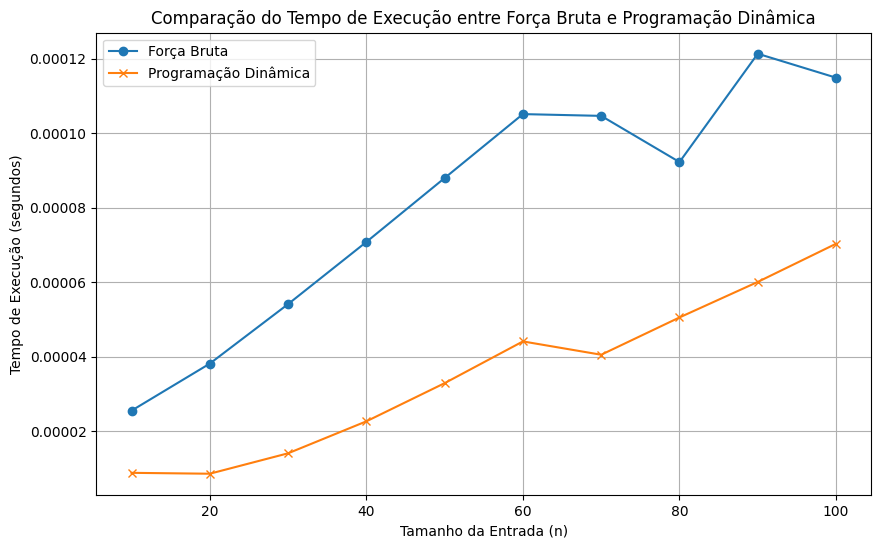

In [10]:
import time
import matplotlib.pyplot as plt
import random

# Algoritmo de Força Bruta
def mochila_forca_bruta(capacidade, pesos, valores):
    n = len(pesos)
    max_valor = 0
    
    for i in range(capacidade + 1):
        valor = 0
        peso_restante = i
        
        for j in range(n):
            valor += (peso_restante // pesos[j]) * valores[j]
            peso_restante = peso_restante % pesos[j]
        
        max_valor = max(max_valor, valor)
    
    return max_valor

# Algoritmo de Programação Dinâmica
def mochila_programacao_dinamica(capacidade, pesos, valores):
    n = len(pesos)
    dp = [0] * (capacidade + 1)
    
    for i in range(n):
        for w in range(pesos[i], capacidade + 1):
            dp[w] = max(dp[w], dp[w - pesos[i]] + valores[i])
    
    return dp[capacidade]

# Função para medir o tempo de execução dos algoritmos
def medir_tempo_execucao(capacidade, pesos, valores, tamanhos_entrada):
    tempos_forca_bruta = []
    tempos_programacao_dinamica = []
    
    for n in tamanhos_entrada:
        # Medindo o tempo de execução da Força Bruta
        start_time = time.time()
        mochila_forca_bruta(n, pesos, valores)
        end_time = time.time()
        tempos_forca_bruta.append(end_time - start_time)
        print(f"Tempo de execução da Força Bruta para n={n}: {tempos_forca_bruta[-1]:.6f} segundos")

        # Medindo o tempo de execução da Programação Dinâmica
        start_time = time.time()
        mochila_programacao_dinamica(n, pesos, valores)
        end_time = time.time()
        tempos_programacao_dinamica.append(end_time - start_time)
        print(f"Tempo de execução da Programação Dinâmica para n={n}: {tempos_programacao_dinamica[-1]:.6f} segundos")
    
    return tamanhos_entrada, tempos_forca_bruta, tempos_programacao_dinamica

# Função para gerar dados aleatórios (Número de itens, pesos, valores e capacidade)
def gerar_dados_aleatorios():
    n_itens = random.randint(10, 100)  # Número de itens aleatório entre 10 e 100
    capacidade_maxima = random.randint(50, 200)  # Capacidade da mochila entre 50 e 200
    
    pesos = [random.randint(1, capacidade_maxima // 2) for _ in range(n_itens)]  # Pesos aleatórios dos itens
    valores = [random.randint(10, 100) for _ in range(n_itens)]  # Valores aleatórios dos itens
    
    print(f"\nDados gerados aleatoriamente:")
    print(f"Número de itens: {n_itens}")
    print(f"Capacidade da mochila: {capacidade_maxima}")
    print(f"Pesos dos itens: {pesos}")
    print(f"Valores dos itens: {valores}\n")
    
    return pesos, valores, capacidade_maxima

# Função para gerar o gráfico de comparação
def gerar_grafico(tamanhos_entrada, tempos_forca_bruta, tempos_programacao_dinamica):
    plt.figure(figsize=(10, 6))
    plt.plot(tamanhos_entrada, tempos_forca_bruta, label='Força Bruta', marker='o')
    plt.plot(tamanhos_entrada, tempos_programacao_dinamica, label='Programação Dinâmica', marker='x')
    
    plt.xlabel('Tamanho da Entrada (n)')
    plt.ylabel('Tempo de Execução (segundos)')
    plt.title('Comparação do Tempo de Execução entre Força Bruta e Programação Dinâmica')
    
    plt.legend()
    plt.grid(True)
    plt.show()

# Função para executar o exemplo com dados totalmente aleatórios
def executar_como_exemplo():
    pesos, valores, capacidade = gerar_dados_aleatorios()  # Gerar dados aleatórios
    tamanhos_entrada = list(range(10, 101, 10))  # Exemplos de diferentes tamanhos de entrada
    tamanhos_entrada, tempos_forca_bruta, tempos_programacao_dinamica = medir_tempo_execucao(capacidade, pesos, valores, tamanhos_entrada)
    
    # Gerar gráfico após a medição dos tempos
    gerar_grafico(tamanhos_entrada, tempos_forca_bruta, tempos_programacao_dinamica)

# Chamada de exemplo com dados aleatórios
executar_como_exemplo()
